In [ ]:
import torch
import torchvision
import torch.nn as nn
import torchvision.transforms as transforms

In [ ]:
class Discriminator(nn.Module):
    def __init__(self, channels_img, features_d):
      super(Discriminator, self).__init__()
      self.net = nn.Sequential(
          # formula = (n-f+2p)/s +1
          # n x 64 x 64
          nn.Conv2d(channels_img, features_d, kernel_size=4, stride=2, padding=1),
          nn.LeakyReLU(0.2),
          # filters x 32 x 32
          nn.Conv2d(features_d, features_d * 2, kernel_size=4, stride=2, padding=1),
          nn.BatchNorm2d(features_d * 2),
          nn.LeakyReLU(0.2),
          # fiters*2 x 16 x 16
          nn.Conv2d(features_d * 2, features_d * 4, kernel_size=4, stride=2, padding=1),
          nn.BatchNorm2d(features_d * 4),
          # filters*4 x 8 x 8
          nn.Conv2d(features_d * 4, features_d * 8, kernel_size=4, stride=2, padding=1),
          nn.BatchNorm2d(features_d * 8),
          nn.LeakyReLU(0.2),
          # filters*8 x 4 x 4
          nn.Conv2d(features_d * 8, 1, kernel_size=4, stride=1, padding=0),
          #1 x 1 x 1
          nn.Sigmoid(),
          )

    def forward(self, x):
      return self.net(x)


class Generator(nn.Module):
    def __init__(self, channels_noise, channels_img, features_g):
        super(Generator, self).__init__()
        self.net = nn.Sequential(
            # trans_conv = [(n - 1)*s] + f - 2p
            # n x channel_noise x 1 x 1
            nn.ConvTranspose2d(channels_noise, features_g * 16, kernel_size=4, stride=1, padding=0),
            nn.BatchNorm2d(features_g * 16),
            nn.ReLU(),
            # filter*16 x 4 x 4
            nn.ConvTranspose2d(features_g * 16, features_g * 8, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(features_g * 8),
            nn.ReLU(),
            # filter*8 x 8 X 8
            nn.ConvTranspose2d(features_g * 8, features_g * 4, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(features_g * 4),
            nn.ReLU(),
            # filter*4 x 16 x 16
            nn.ConvTranspose2d(features_g * 4, features_g * 2, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(features_g * 2),
            nn.ReLU(),
            # filter*2 x 32 x 32
            nn.ConvTranspose2d(features_g * 2, channels_img, kernel_size=4, stride=2, padding=1),
            # N x 64 x 64
            nn.Tanh(),
            )

    def forward(self,x):
      return self.net(x)

In [ ]:
# hyperpaprameters
import torchvision.datasets as datasets
from torch.utils.data import (
    DataLoader,
) 
lr = 0.0002
batch_size = 64
num_epochs = 10

image_size = 64

channels_img = 1
channels_noise = 256


features_d = 16
features_g = 16

my_transforms = transforms.Compose([transforms.Resize(image_size), 
                                    transforms.ToTensor(),
                                    transforms.Normalize((0.5),(0.5)),
                                    ])

dataset = datasets.MNIST(root='dataset/', train=True,transform=my_transforms, download=True)
dataloader = DataLoader(dataset,batch_size = batch_size, shuffle= True)


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [ ]:
netD = Discriminator(channels_img, features_d).to(device)
netG = Generator(channels_noise,channels_img,features_g).to(device)

In [ ]:
import torch.optim as optim
from torch.utils.tensorboard import SummaryWriter
optimiseD = optim.Adam(netD.parameters(),lr=lr, betas=(0.5,0.999))
optimiseG = optim.Adam(netG.parameters(),lr=lr, betas=(0.5,0.999))


In [ ]:
netG.train()

Generator(
  (net): Sequential(
    (0): ConvTranspose2d(256, 256, kernel_size=(4, 4), stride=(1, 1))
    (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (7): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU()
    (9): ConvTranspose2d(64, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (10): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU()
    (12): ConvTranspose2d(32, 1, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (13): Tanh()
  )
)

In [ ]:
netD.train()

Discriminator(
  (net): Sequential(
    (0): Conv2d(1, 16, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): LeakyReLU(negative_slope=0.2)
    (2): Conv2d(16, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (3): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): LeakyReLU(negative_slope=0.2)
    (5): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (6): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): LeakyReLU(negative_slope=0.2)
    (10): Conv2d(128, 1, kernel_size=(4, 4), stride=(1, 1))
    (11): Sigmoid()
  )
)

In [ ]:
criterion = nn.BCELoss()

real_label = 1
fake_label = 0

fixed_noise = torch.randn(64, channels_noise, 1, 1).to(device)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
def show(img):
  columns = 4
  rows = 5
  fig=plt.figure(figsize=(8, 8))
  for i in range(1, columns*rows +1):
    im = img[i].detach().numpy()
    im = np.array(im)
    im = np.reshape(im,(64,64))
    fig.add_subplot(rows, columns, i)
    plt.imshow(im)
  plt.show() 


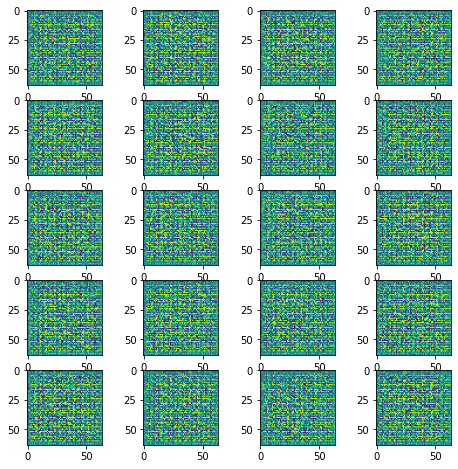

Epoch [0/10] Batch 0/938  Loss D:1.3410 lossG:0.9081 
Epoch [0/10] Batch 100/938  Loss D:0.6687 lossG:2.9782 
Epoch [0/10] Batch 200/938  Loss D:0.6960 lossG:2.0507 
Epoch [0/10] Batch 300/938  Loss D:0.6923 lossG:2.5737 
Epoch [0/10] Batch 400/938  Loss D:0.6823 lossG:2.5882 
Epoch [0/10] Batch 500/938  Loss D:0.7464 lossG:3.3544 
Epoch [0/10] Batch 600/938  Loss D:0.9458 lossG:2.3750 
Epoch [0/10] Batch 700/938  Loss D:0.8786 lossG:1.7061 
Epoch [0/10] Batch 800/938  Loss D:1.9451 lossG:3.8372 
Epoch [0/10] Batch 900/938  Loss D:1.0036 lossG:0.9279 


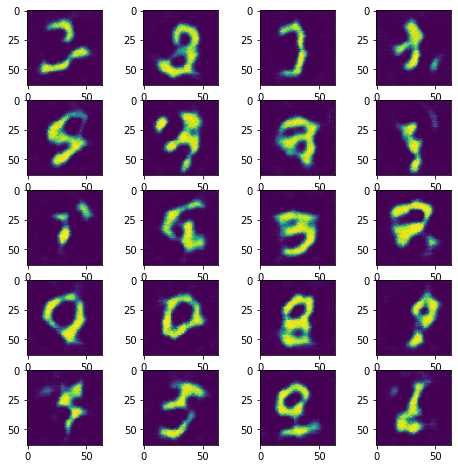

Epoch [1/10] Batch 0/938  Loss D:0.8308 lossG:2.3338 
Epoch [1/10] Batch 100/938  Loss D:0.8405 lossG:1.5505 
Epoch [1/10] Batch 200/938  Loss D:1.0164 lossG:2.3736 
Epoch [1/10] Batch 300/938  Loss D:0.9122 lossG:1.7959 
Epoch [1/10] Batch 400/938  Loss D:0.8625 lossG:1.4006 
Epoch [1/10] Batch 500/938  Loss D:0.8887 lossG:1.4372 
Epoch [1/10] Batch 600/938  Loss D:0.7904 lossG:1.3547 
Epoch [1/10] Batch 700/938  Loss D:0.7924 lossG:1.5802 
Epoch [1/10] Batch 800/938  Loss D:0.8747 lossG:1.8831 
Epoch [1/10] Batch 900/938  Loss D:0.9124 lossG:1.4492 


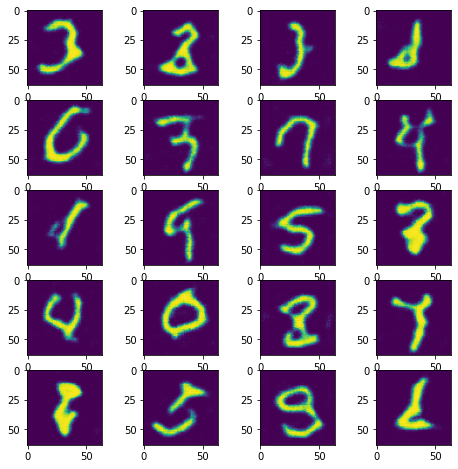

Epoch [2/10] Batch 0/938  Loss D:0.8260 lossG:1.5924 
Epoch [2/10] Batch 100/938  Loss D:0.8401 lossG:1.4878 
Epoch [2/10] Batch 200/938  Loss D:0.8809 lossG:2.0866 
Epoch [2/10] Batch 300/938  Loss D:0.9698 lossG:1.4542 
Epoch [2/10] Batch 400/938  Loss D:0.8261 lossG:1.5748 
Epoch [2/10] Batch 500/938  Loss D:0.9594 lossG:1.3998 
Epoch [2/10] Batch 600/938  Loss D:0.8469 lossG:1.7150 
Epoch [2/10] Batch 700/938  Loss D:0.8874 lossG:2.0414 
Epoch [2/10] Batch 800/938  Loss D:0.9942 lossG:1.3124 
Epoch [2/10] Batch 900/938  Loss D:0.8893 lossG:1.6289 


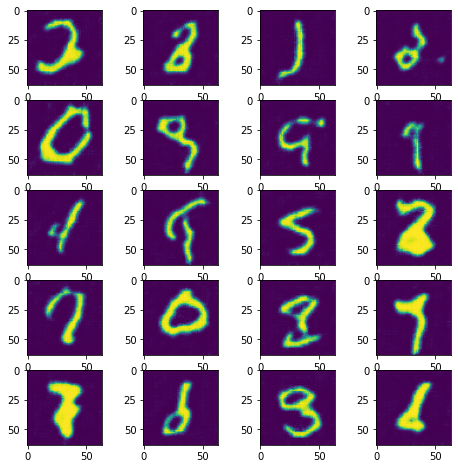

Epoch [3/10] Batch 0/938  Loss D:0.8252 lossG:1.3234 
Epoch [3/10] Batch 100/938  Loss D:1.1006 lossG:0.4793 
Epoch [3/10] Batch 200/938  Loss D:0.8231 lossG:1.8419 
Epoch [3/10] Batch 300/938  Loss D:0.8801 lossG:1.0516 
Epoch [3/10] Batch 400/938  Loss D:0.9311 lossG:2.0688 
Epoch [3/10] Batch 500/938  Loss D:0.7727 lossG:1.4768 
Epoch [3/10] Batch 600/938  Loss D:0.9284 lossG:2.1766 
Epoch [3/10] Batch 700/938  Loss D:0.7877 lossG:1.3393 
Epoch [3/10] Batch 800/938  Loss D:0.8791 lossG:1.3952 
Epoch [3/10] Batch 900/938  Loss D:0.7714 lossG:1.5640 


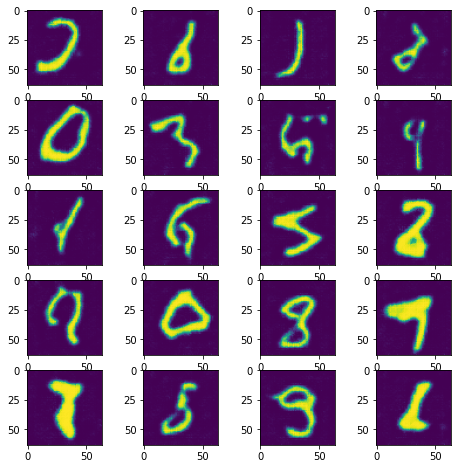

Epoch [4/10] Batch 0/938  Loss D:2.0175 lossG:0.4458 
Epoch [4/10] Batch 100/938  Loss D:0.8731 lossG:1.1143 
Epoch [4/10] Batch 200/938  Loss D:0.9396 lossG:1.0166 
Epoch [4/10] Batch 300/938  Loss D:0.8085 lossG:1.4870 
Epoch [4/10] Batch 400/938  Loss D:1.1334 lossG:3.2827 
Epoch [4/10] Batch 500/938  Loss D:0.7906 lossG:1.9950 
Epoch [4/10] Batch 600/938  Loss D:0.8719 lossG:1.4308 
Epoch [4/10] Batch 700/938  Loss D:0.7276 lossG:2.0316 
Epoch [4/10] Batch 800/938  Loss D:0.8010 lossG:1.3353 
Epoch [4/10] Batch 900/938  Loss D:0.7849 lossG:2.0960 


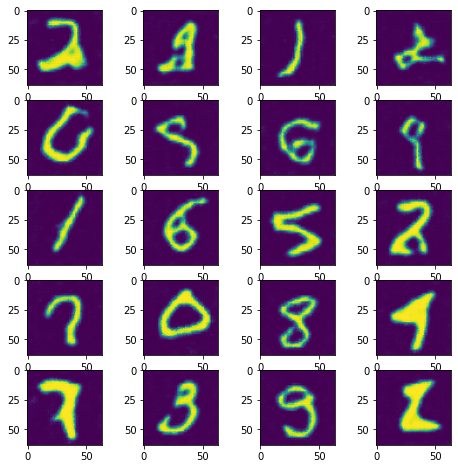

Epoch [5/10] Batch 0/938  Loss D:0.7308 lossG:1.8954 
Epoch [5/10] Batch 100/938  Loss D:0.8177 lossG:1.7019 
Epoch [5/10] Batch 200/938  Loss D:0.7459 lossG:1.6579 


KeyboardInterrupt: ignored

In [ ]:
# training

writer_real = SummaryWriter(f'test_real')
writer_real = SummaryWriter(f'test_fake')
import matplotlib.pyplot as plt

for epoch in range(num_epochs):
  with torch.no_grad():
    fake = netG(fixed_noise)
  img = fake.to("cpu")
  show(img)
  for batch_idx, (data, targets) in enumerate(dataloader):
    # discriminator = max(log(D(x)) + log(1 - D(G(z))))
    data = data.to(device)
    batch_size = data.shape[0]
    netD.zero_grad()
    label = (torch.ones(batch_size)*0.9).to(device)
    output = netD(data).reshape(-1)
    lossD_real = criterion(output, label)
    D_x = output.mean().item()


    noise = torch.randn(batch_size, channels_noise,1,1).to(device)
    fake = netG(noise)
    label = (torch.ones(batch_size)*0.1).to(device)
    output = netD(fake.detach()).reshape(-1)
    lossD_fake = criterion(output, label)
    lossD = lossD_real + lossD_fake
    lossD.backward()
    optimiseD.step()


    # generator = min(log(1 - D(G(z)))) OR  max(log(D(G(z))))
    netG.zero_grad()
    label = torch.ones(batch_size).to(device)
    output = netD(fake).reshape(-1)
    lossG = criterion(output, label)
    lossG.backward()
    optimiseG.step()
    

    if(batch_idx %100 == 0):
      print(f'Epoch [{epoch}/{num_epochs}] Batch {batch_idx}/{len(dataloader)}  Loss D:{lossD:.4f} lossG:{lossG:.4f} ')
      with torch.no_grad():
        fake = netG(fixed_noise)
  
        